# Case Study on Measures of Central Tendency and Dispersion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("StudentsPerformance (1).csv")

In [3]:
df = pd.DataFrame(dataset)
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
#inorder to find any missing values
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

thus we have no null values

In [5]:
df.describe()
#for summary of statistics

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


# 1. Find out how many males and females participated in the test.

In [6]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

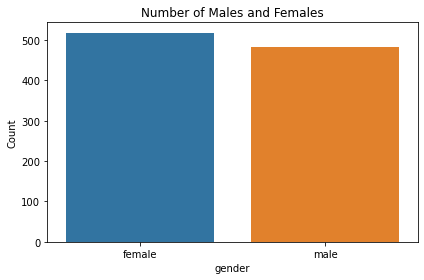

In [7]:
#Here we have got number of males and females who participated in the test

sns.countplot(dataset['gender'])
plt.title('Number of Males and Females')
plt.xlabel('gender')
plt.ylabel('Count')
plt.tight_layout()

# 2. What do you think about the students' parental level of education?

In [8]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

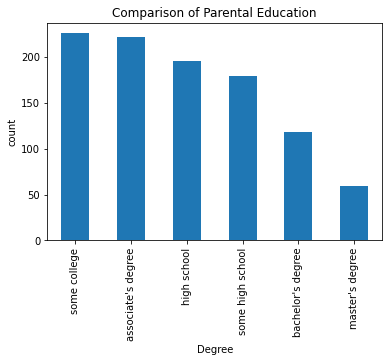

In [9]:
# to visualize the parental education levels

df['parental level of education'].value_counts(normalize = True)
df['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#Here we can see that most of them have some college level education and associates degree but very few have masters degree.

# 3. Who scores the most on average for math, reading and writing based on


# ● Gender

In [11]:
g1=df.groupby('gender')['math score'].mean()
g1

gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

In [12]:
#males scored more in maths.

In [13]:
g2=df.groupby('gender')['reading score'].mean()
g2

gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64

In [14]:
#here females scored more

In [15]:
g3=df.groupby('gender')['writing score'].mean()
g3

gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64

In [16]:
#here also females scored more

# ● Test preparation course

In [17]:
tp1=df.groupby('test preparation course')['math score'].mean()
tp1

test preparation course
completed    69.96648
none         63.78972
Name: math score, dtype: float64

In [18]:
tp2=df.groupby('test preparation course')['reading score'].mean()
tp2

test preparation course
completed    74.175978
none         66.417445
Name: reading score, dtype: float64

In [19]:
tp3=df.groupby('test preparation course')['writing score'].mean()
tp3

test preparation course
completed    74.684358
none         64.457944
Name: writing score, dtype: float64

In [20]:
#More people completed the test course.

# 4. What do you think about the scoring variation for math, reading and writing
based on

# ● Gender

In [21]:
g1=df.groupby('gender')['math score'].std()
g1

gender
female    16.029928
male      14.556411
Name: math score, dtype: float64

In [22]:
g2=df.groupby('gender')['reading score'].std()
g2

gender
female    14.411018
male      14.149594
Name: reading score, dtype: float64

In [23]:
g3=df.groupby('gender')['writing score'].std()
g3

gender
female    14.844842
male      14.227225
Name: writing score, dtype: float64

In [24]:
#Here we are getting the standard deviation. Here males seem to be more consistent.

# ● Test preparation course

In [25]:
tp1=df.groupby('test preparation course')['math score'].std()
tp1

test preparation course
completed    14.521847
none         15.705689
Name: math score, dtype: float64

In [26]:
tp2=df.groupby('test preparation course')['reading score'].std()
tp2

test preparation course
completed    13.537572
none         14.608896
Name: reading score, dtype: float64

In [27]:
tp3=df.groupby('test preparation course')['writing score'].std()
tp3

test preparation course
completed    13.236412
none         15.041667
Name: writing score, dtype: float64

In [32]:
# The people who completed test preparation course scored better than those who did not.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [28]:
#cutoff score
df['math score'].quantile(.75)

77.0

In [29]:
#the top 25% scored above 77

In [30]:
df[df['math score']>=77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [31]:
#there are 255 rows, 
#which means that 256 students(as counting started from 0) are eligible for bonus points.
